In [1]:
import os, sys, time
import tifffile as tif
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe")
from tools.utils.io import makedir
from tools.registration.register import change_interpolation_order, transformix_command_line_call
from tools.registration.transform_list_of_points import modify_transform_files
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

## Purpose: to compare two separate annotations files and outputs from calculating_vox-diffs... notebook

In [5]:
src = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet"
# affinefile = os.path.join(src, "output_dirs/valdes_to_PRA_affine/result.tif")
# transformixedfile = os.path.join(src, "output_dirs/valdes_to_PRA/result.tif")
ann1filename = os.path.join(src,"labels/valdes-hernandez_labels.csv")
ann2filename = os.path.join(src,"labels/chon_label_ids.csv")
percent1csv = os.path.join(src,"valdes_to_PRA_percent.csv")
percent2csv = os.path.join(src,"Chon_to_PRA_percent.csv")
# transformixed_relative_ZEROED_tiff = os.path.join(src,"valdes_to_PRA_relative_ZEROED_tiff.tif")
# transformixed_relative_tiff = os.path.join(src,"valdes_to_PRA_relative_tiff.tif")

In [6]:
#affine = tif.imread(affinefile)
#print("read affine tiff")
#transformixed = tif.imread(transformixedfile)
#print("read transformixed tiff")

In [7]:
# make sure your annotations have the first column as id number, 2nd as abbreviation, or else change the input below
ann1=pd.read_csv(ann1filename,usecols=[0,1],header=0,names=['id','abbr'])
ann2=pd.read_csv(ann2filename,usecols=[0,1],header=0,names=['id','abbr'])

In [11]:
df = ann1

In [12]:
df.insert(2,'ann2id',ann2['id'])
df.insert(3,'ann2abbr',ann2['abbr'])

In [13]:
df

,id,abbr,ann2id,ann2abbr
0,1,AID,1,VTM
1,2,AIP,2,S1ULp-6b
2,3,AIV,3,sf
3,4,APir,4,IC
4,5,Au1,6,ic
...,...,...,...,...
157,146,BedNucofSTL,204,MiA
158,148,PituitL,206,RMg
159,150,VentriclesL,207,AP
160,152,OpticPthL,208,ACo-3


In [61]:
for i in df['id']:
    df.transformixed_vox[i] = np.size(transformixed[transformixed==df.id[i]])
    df.affine_vox[i] = np.size(affine[affine==df.id[i]])

<ipython-input-61-5b4b09f8b678>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.transformixed_vox[i] = np.size(transformixed[transformixed==df.id[i]])
<ipython-input-61-5b4b09f8b678>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.affine_vox[i] = np.size(affine[affine==df.id[i]])


In [62]:
df['change'] = df['affine_vox']-df['transformixed_vox']

In [63]:
df

,id,abbr,affine_vox,transformixed_vox,change
0,1,AID,0,0,0
1,2,AIP,389370,370564,18806
2,3,AIV,283199,281826,1373
3,4,APir,258438,246453,11985
4,5,Au1,634157,589051,45106
...,...,...,...,...,...
157,146,BedNucofSTL,0,0,0
158,148,PituitL,0,0,0
159,150,VentriclesL,0,0,0
160,152,OpticPthL,0,0,0


In [64]:
df = df[df.transformixed_vox > 0]
df

,id,abbr,affine_vox,transformixed_vox,change
1,2,AIP,389370,370564,18806
2,3,AIV,283199,281826,1373
3,4,APir,258438,246453,11985
4,5,Au1,634157,589051,45106
5,6,AuD,310826,290206,20620
...,...,...,...,...,...
150,132,FimbriaL,630631,658444,-27813
151,134,CorpColloL,988558,1045616,-57058
152,136,AmygL,1047422,990460,56962
153,138,PreopAreaL,426088,422010,4078


In [65]:
dfpercent = (df['change']/df['transformixed_vox'])*100
dfpercent[np.isinf(dfpercent)]=0
df['percent'] = dfpercent
dfpercent.replace(0,np.nan)

<ipython-input-65-fce1c83d1c49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percent'] = dfpercent


1      5.074967
2      0.487180
3      4.862996
4      7.657401
5      7.105298
         ...   
150   -4.224049
151   -5.456879
152    5.751065
153    0.966328
154   -3.655068
Length: 154, dtype: float64

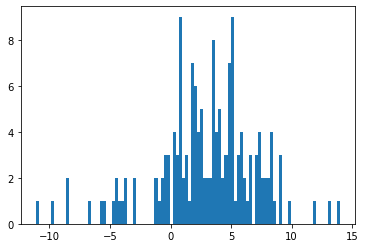

In [66]:
plt.hist(df.percent,bins=100)
plt.show()

In [67]:
mp = np.nanmedian(df.percent)
sp = np.nanstd(df.percent)

In [68]:
highmp = mp+sp
highmp

7.599382989196152

In [69]:
lowmp = mp-sp
lowmp

-0.7200872153348401

In [70]:
df.to_csv(percentcsv)

In [71]:
df=pd.read_csv(percentcsv)

In [72]:
df

,Unnamed: 0,id,abbr,affine_vox,transformixed_vox,change,percent
0,1,2,AIP,389370,370564,18806,5.074967
1,2,3,AIV,283199,281826,1373,0.487180
2,3,4,APir,258438,246453,11985,4.862996
3,4,5,Au1,634157,589051,45106,7.657401
4,5,6,AuD,310826,290206,20620,7.105298
...,...,...,...,...,...,...,...
149,150,132,FimbriaL,630631,658444,-27813,-4.224049
150,151,134,CorpColloL,988558,1045616,-57058,-5.456879
151,152,136,AmygL,1047422,990460,56962,5.751065
152,153,138,PreopAreaL,426088,422010,4078,0.966328


In [73]:
too = df.id
too

0        2
1        3
2        4
3        5
4        6
      ... 
149    132
150    134
151    136
152    138
153    140
Name: id, Length: 154, dtype: int64

In [74]:
transformixed_relative = transformixed

In [75]:
# add list of unique values not in twoxh/twoxl but in transformixed
x = np.unique(transformixed)
np.size(x)

155

In [76]:
test = np.setdiff1d(x,too)
np.size(test)

9

In [77]:
for i in test:
    transformixed_relative[transformixed_relative==i]=0

In [78]:
tif.imsave(transformixed_relative_ZEROED_tiff,transformixed_relative)

In [79]:
for i in too:
    transformixed_relative[transformixed_relative==i]=df.loc[df['id']==i,'percent'].iloc[0]

In [80]:
tif.imsave(transformixed_relative_tiff,transformixed_relative)

# If you already have a percent file

In [81]:
df=pd.read_csv(percentcsv)

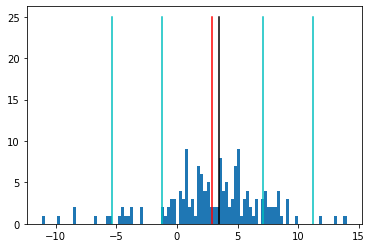

In [82]:
plt.hist(df.percent[df.affine_vox>5],bins=100)

dfmean = np.nanmean(df.percent[df.affine_vox>5])
dfmedian = np.nanmedian(df.percent[df.affine_vox>5])
dfstd = np.std(df.percent[df.affine_vox>5])
mp = dfmean + dfstd
mm = dfmean - dfstd

mp2 = dfmean + 2*dfstd
mp3 = dfmean + 3*dfstd
mm2 = dfmean - 2*dfstd
mm3 = dfmean - 3*dfstd


plt.plot([dfmean, dfmean],[0,25],'r')
plt.plot([dfmedian, dfmedian],[0,25],'k')
plt.plot([mp,mp],[0,25],'c')
plt.plot([mm,mm],[0,25],'c')
plt.plot([mp2,mp2],[0,25],'c')
plt.plot([mm2,mm2],[0,25],'c')
plt.show()

In [83]:
# want to make summary -- ideally show a ranked 3, 2, 1std>mean 
# in diff colors, and then the 
# values either written or in bar form on the right

df

,Unnamed: 0,id,abbr,affine_vox,transformixed_vox,change,percent
0,1,2,AIP,389370,370564,18806,5.074967
1,2,3,AIV,283199,281826,1373,0.487180
2,3,4,APir,258438,246453,11985,4.862996
3,4,5,Au1,634157,589051,45106,7.657401
4,5,6,AuD,310826,290206,20620,7.105298
...,...,...,...,...,...,...,...
149,150,132,FimbriaL,630631,658444,-27813,-4.224049
150,151,134,CorpColloL,988558,1045616,-57058,-5.456879
151,152,136,AmygL,1047422,990460,56962,5.751065
152,153,138,PreopAreaL,426088,422010,4078,0.966328


In [84]:
df2p = df[df.percent>mp2]
df2p = df2p.sort_values('percent',ascending=False)
df2m = df[df.percent < mm2]
df2m = df2m.sort_values('percent',ascending=False)

In [85]:
df2m

,Unnamed: 0,id,abbr,affine_vox,transformixed_vox,change,percent
150,151,134,CorpColloL,988558,1045616,-57058,-5.456879
69,70,133,CorpCollo,1057553,1122489,-64936,-5.785001
146,147,126,HippFormL,2226512,2387175,-160663,-6.730256
77,78,149,Ventricles,52591,57498,-4907,-8.534210
65,66,125,HippForm,2269373,2482259,-212886,-8.576301
139,140,112,HindbrL,4298318,4762565,-464247,-9.747835
58,59,111,Hindbr,4091615,4604107,-512492,-11.131192


In [86]:
df2p

,Unnamed: 0,id,abbr,affine_vox,transformixed_vox,change,percent
118,119,87,S1ULpL,563086,493930,69156,14.001174
110,111,79,S1BFL,926206,818878,107328,13.106714
29,30,31,S1BF,897201,802626,94575,11.783197


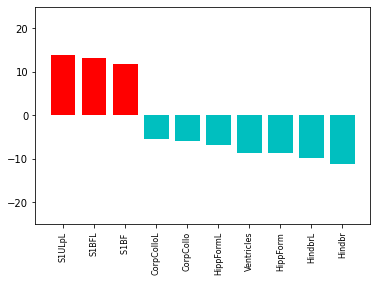

In [87]:
plt.bar(df2p.abbr,df2p.percent,color='r')
plt.bar(df2m.abbr,df2m.percent,color='c')
plt.xticks(rotation=90,fontsize=8)
plt.ylim([-25,25])
plt.show()

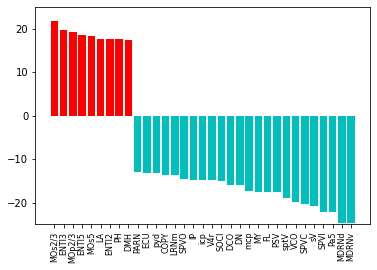

In [54]:
plt.bar(df2p.abbr,df2p.percent,color='r')
plt.bar(df2m.abbr,df2m.percent,color='c')
plt.xticks(rotation=90,fontsize=8)
plt.ylim([-25,25])
plt.show()